AVCAD - Exercise 9

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

Using the dataset in EFIplus_medit.zip:

In [5]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering

In [6]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_douro_tejo = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

In [8]:
continuous_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_continuous = df_douro_tejo[continuous_variables]

1. Run agglomerative cluster analysis using different linkage methods based on quantitative
environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

Compute a dendrogram with single linkage

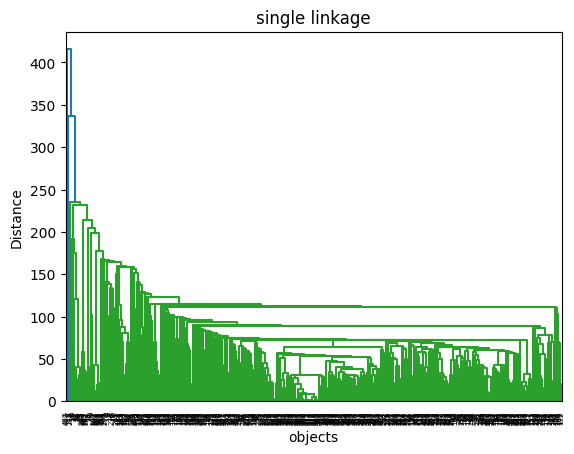

In [17]:
dendrogram_plot = dendrogram(linkage(df_continuous, method='single'))
plt.title('single linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with complete linkage

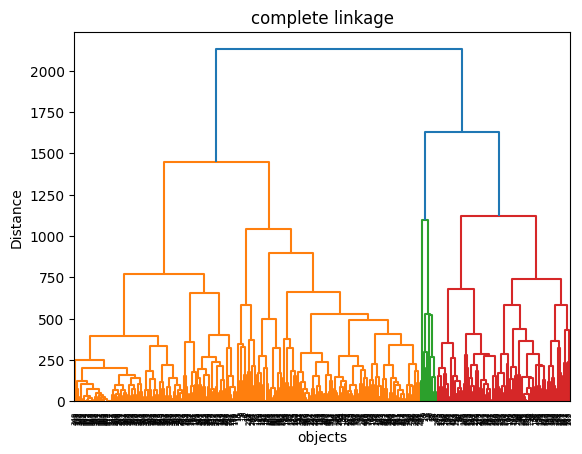

In [18]:
dendrogram_plot = dendrogram(linkage(df_continuous, method='complete'))
plt.title('complete linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with average linkage

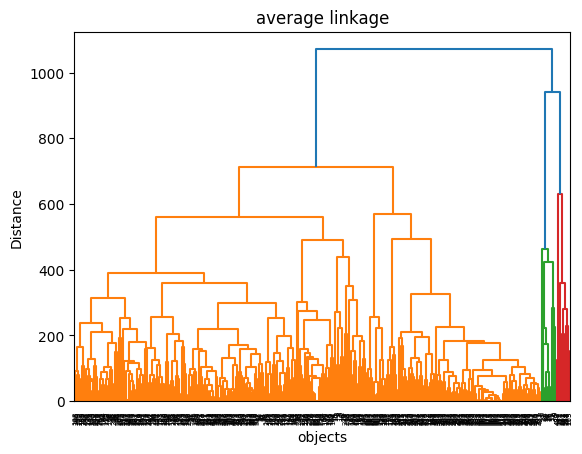

In [19]:
dendrogram_plot = dendrogram(linkage(df_continuous, method='average'))
plt.title('average linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with centroid linkage

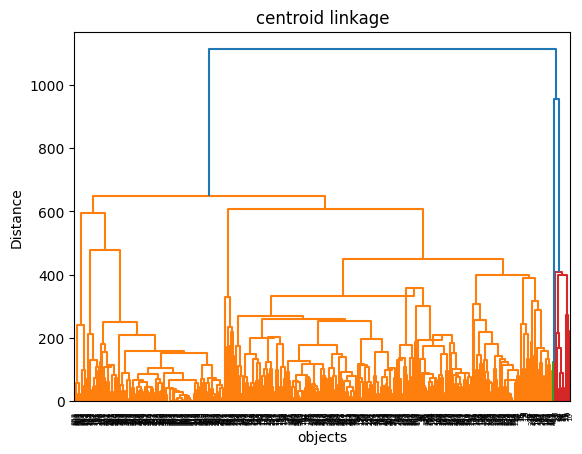

In [20]:
dendrogram_plot = dendrogram(linkage(df_continuous, method='centroid'))
plt.title('centroid linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with Ward's linkage

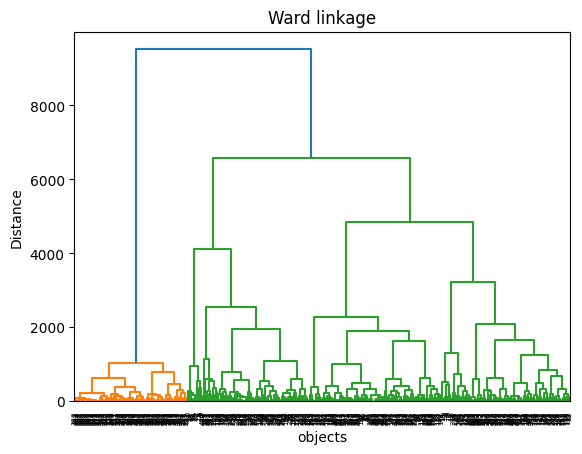

In [21]:
dendrogram_plot = dendrogram(linkage(df_continuous, method='ward'))
plt.title('Ward linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with average linkage and other options

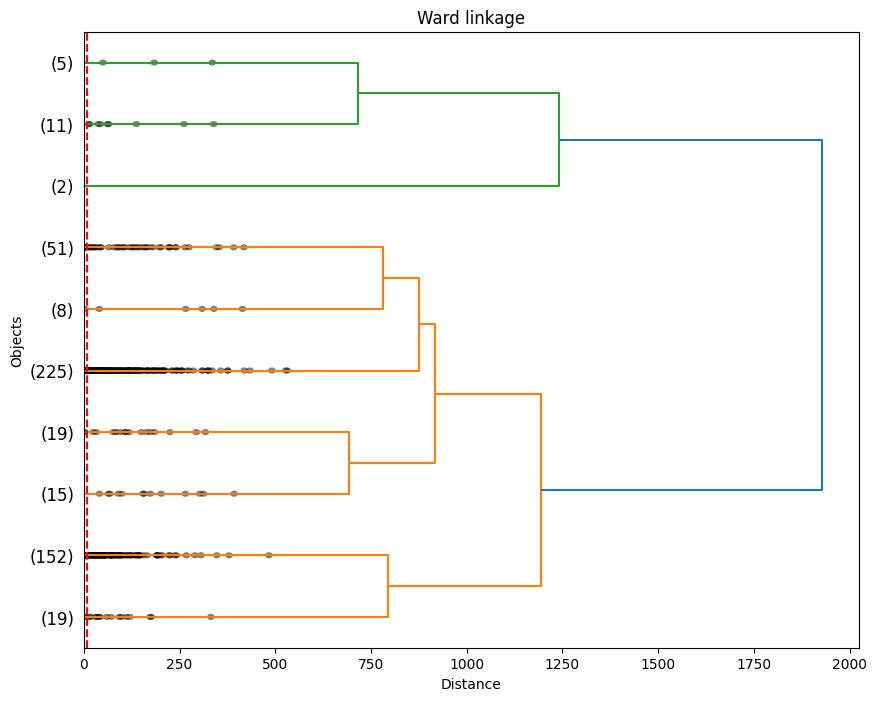

In [22]:
# run linkage
linkward = linkage(df_continuous, 
                   metric = 'cityblock', # cityblock or Manhattan dissimilarity for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkward, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage' )
plt.xlabel('Distance')
plt.ylabel('Objects')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=8, color='r', linestyle='--')

2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

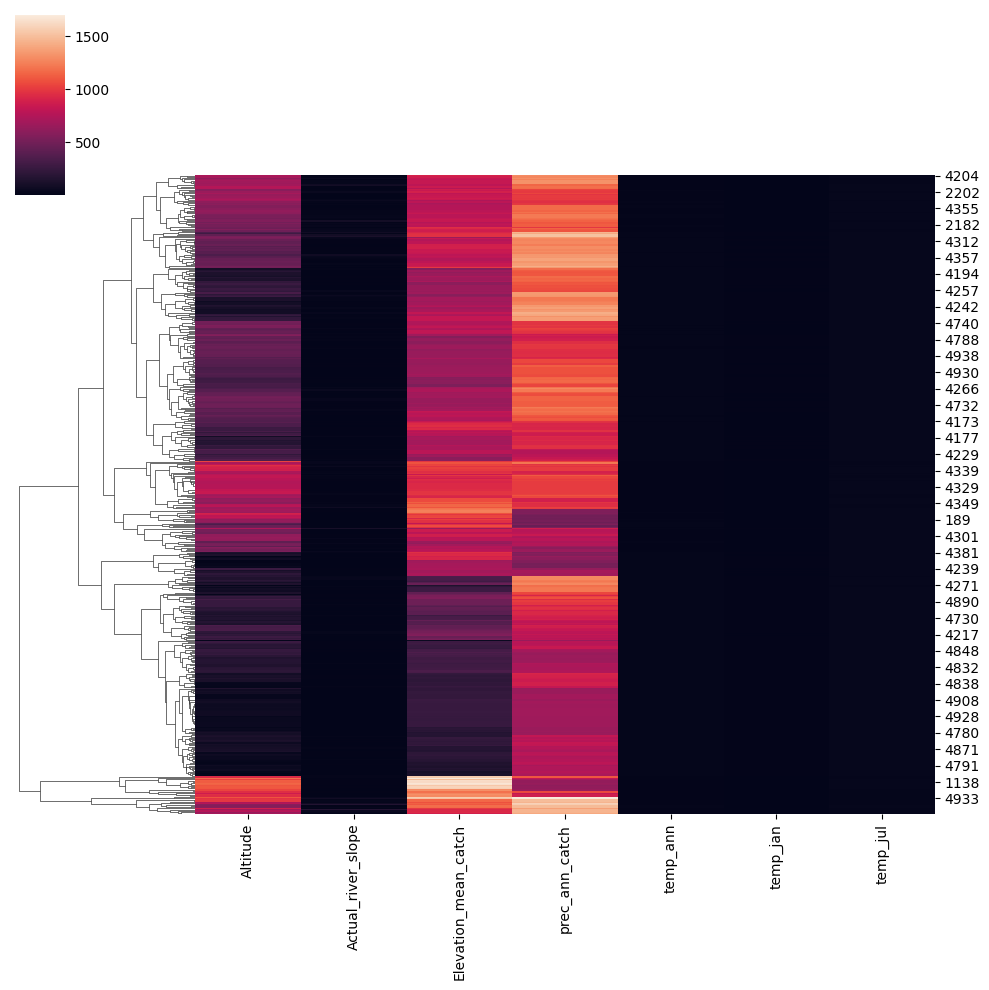

In [25]:
sns.clustermap(df_continuous, col_cluster=False, row_cluster=True, method='average')
plt.show()

3. Plot a dendrogram that clusters the environmental variables instead (columns) using average inkage - discuss how this would help to select variables for e.g a regression-based analysis

(NOTE: to transpose a dataframe use "name of the datarame".T)

In [11]:
df_transposed = df_continuous.T
df_transposed

,18,19,28,32,43,44,60,66,71,91,...,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951
Altitude,1179.000000,1038.000000,636.000000,890.000000,872.000000,730.000000,859.000000,934.000000,791.000000,956.000000,...,510.000000,460.000000,291.000000,719.000,50.000000,38.000000,26.000000,20.000000,13.000000,13.000000
Actual_river_slope,0.001000,2.258000,0.263000,2.909000,3.530000,2.206000,2.655000,19.135000,1.176000,4.056000,...,7.400000,8.200000,11.000000,25.300,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Elevation_mean_catch,1687.103217,1293.238318,967.398405,1088.329483,985.273741,917.296485,1264.722508,1558.687426,1040.965434,1308.297777,...,696.099166,753.372807,588.213718,838.082,707.054385,704.675069,702.673201,697.730192,679.784324,678.426582
prec_ann_catch,810.092422,650.030528,513.949149,553.756064,518.863081,488.414552,809.813332,1097.125444,495.604984,872.902708,...,1139.124517,1266.014637,1155.072338,1006.210,513.404304,515.039678,516.097287,518.386401,556.028518,556.481186
temp_ann,9.300000,10.400000,12.600000,11.200000,11.100000,12.400000,10.700000,10.000000,12.000000,9.900000,...,14.400000,14.300000,15.200000,12.300,17.200000,17.100000,17.100000,16.700000,16.700000,16.800000
temp_jan,1.400000,2.200000,3.800000,2.700000,2.600000,3.500000,2.700000,2.600000,3.300000,2.700000,...,7.500000,8.000000,8.700000,4.500,9.900000,10.300000,10.400000,10.800000,10.900000,11.000000
temp_jul,18.400000,19.600000,21.300000,20.500000,20.000000,21.300000,18.700000,18.800000,21.300000,17.300000,...,22.000000,21.100000,21.300000,20.800,24.300000,23.800000,23.600000,22.900000,22.700000,22.600000


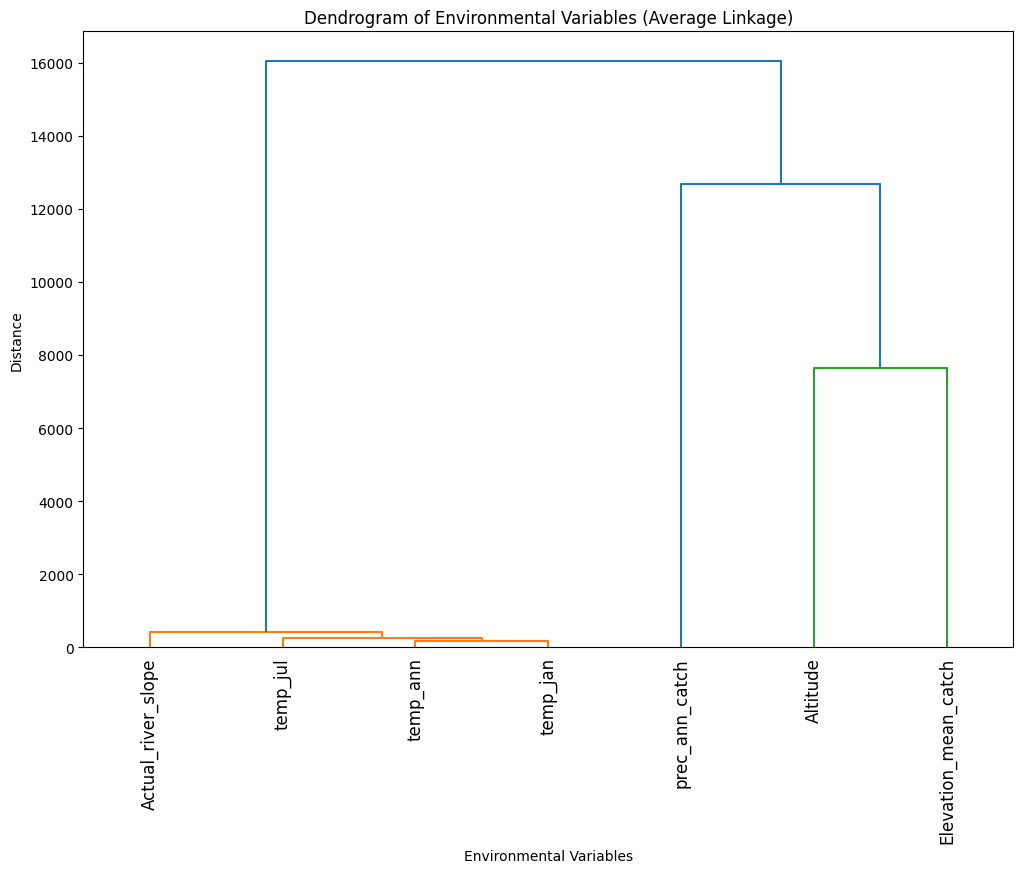

In [12]:
# Perform agglomerative clustering with average linkage
linkage_average = linkage(df_transposed, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram_plot = dendrogram(linkage_average, labels=df_transposed.index)
plt.title('Dendrogram of Environmental Variables (Average Linkage)')
plt.xlabel('Environmental Variables')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

Discussing how this dendrogram can help select variables for a regression-based analysis:

- Identifying Variable Groups: The dendrogram can reveal groups of environmental variables that cluster together, suggesting similar patterns or relationships. For example, variables clustered closely together may share common underlying factors or may be correlated.

- Reducing Multicollinearity: In regression analysis, multicollinearity (high correlation between predictor variables) can affect the stability and interpretability of regression coefficients. By identifying clusters of correlated variables, you can choose representative variables from each cluster to reduce multicollinearity while retaining important information.

- Feature Selection: The dendrogram can aid in feature selection by highlighting which variables contribute most to the clustering structure. Variables that form distinct clusters or are closely linked to other variables may be more relevant for modeling and can be prioritized in the regression analysis.

- Dimensionality Reduction: Clustering the variables can help identify redundant or less informative variables, allowing for dimensionality reduction in the regression model. By selecting representative variables from each cluster, you can build a more parsimonious model without sacrificing predictive power.